In [1]:
import numpy as np
from gpr import kron_prod, kron_prod_naive, GPR,make_grid
import matplotlib.pyplot as plt
from scipy.optimize import minimize

In [2]:
n_rows = [3,5,7,6]
n_col = [4,4,8,5]
dim = np.prod(n_col)
A = [np.random.random([x,y]) for x,y in zip(n_rows,n_col)]
b = np.random.random(dim)

In [3]:
np.linalg.norm(kron_prod(A,b)-kron_prod_naive(A,b))

1.8041175391148701e-13

In [4]:
d=3
x_train = [np.linspace(0,1,100) for i in range(d)]
x_grid=make_grid(x_train)
n=x_grid.shape[0]
def f(xx):
    return np.sin(20*xx.sum(axis=1))
y_train = f(x_grid)+np.random.normal(0,0.05,n)
gpr=GPR()
gpr.fit_weights(x_train,y_train)

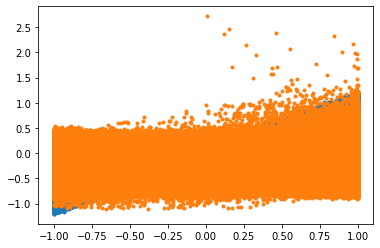

In [5]:
plt.plot(f(x_grid),y_train,'.')
x_test = [np.sort(np.random.random(100)) for i in range(d)]
x_grid_test=make_grid(x_test)
plt.plot(f(x_grid_test),gpr.predict(x_test),'.')

In [14]:
dx = np.array([(np.diff(x).mean() * 2, (x.max() - x.min())) for x in x_train])

def sigmoid(x):
    res = np.zeros(x.size)
    ind = x>=0
    res[ind] = 1/(1+np.exp(-x[ind]))
    ind = ~ind
    q=np.exp(x[ind])
    res[ind] = q/(1+q)
    return res
    
    

def target_fun(x):
    q =sigmoid(x[:-1])
    #q=q/(1+q)
    length_scale = q*dx[:,0]+(1-q)*dx[:,1]
    #print(q,length_scale)
    gpr.fit_weights(x_train, y_train, noise=x[-1], length_scale=length_scale)
    return gpr.minus_log_likelihood

x0=np.array([1]*gpr.nr_dimensions+[1e-6])
target_fun(x0)
sol = minimize(target_fun,x0)

In [16]:
q =sigmoid(sol.x[:-1])
length_scale = q*dx[:,0]+(1-q)*dx[:,1]
gpr.fit_weights(x_train, y_train, noise=sol.x[-1], length_scale=length_scale)

In [18]:
sol.x,length_scale

(array([ 5.92136689e+03,  1.74224700e+04,  3.05694560e+04, -4.89480138e-02]),
 array([0.02020202, 0.02020202, 0.02020202]))

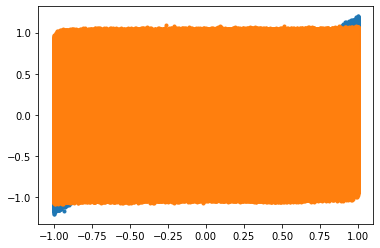

In [17]:
plt.plot(f(x_grid),y_train,'.')
x_test = [np.sort(np.random.random(100)) for i in range(d)]
x_grid_test=make_grid(x_test)
plt.plot(f(x_grid_test),gpr.predict(x_test),'.')